In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
ames = pd.read_csv("train.csv") 
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### GarageCars


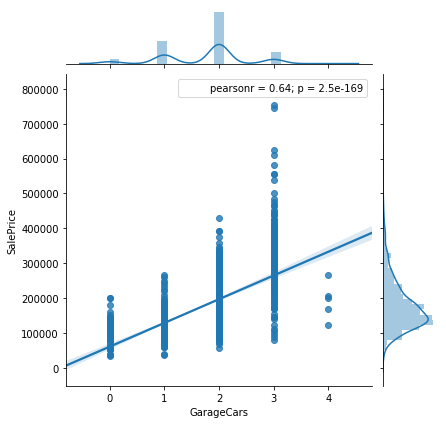

In [47]:
sns.jointplot(x='GarageCars', y='SalePrice', data=ames, kind="reg")

In [48]:
group_garagecars = ames.groupby('GarageCars')

In [49]:
group_garagecars.size()

GarageCars
0     81
1    369
2    824
3    181
4      5
dtype: int64

In [50]:
group_garagecars.size().sum()  #no missing values

1460

In [51]:
print(round(100*group_garagecars.size()/(len(ames['GarageCars'])),2))

GarageCars
0     5.55
1    25.27
2    56.44
3    12.40
4     0.34
dtype: float64


In [52]:
stats.linregress(ames.GarageCars, ames.SalePrice)

LinregressResult(slope=68077.997646347, intercept=60618.9808715238, rvalue=0.6404091972583531, pvalue=2.4986441671736333e-169, stderr=2138.212364138837)

In [53]:
ames.GarageCars = ["NoGarage" if gc == 0 else "AtLeastOne" for gc in ames.GarageCars]

In [54]:
group_garagecars = ames.groupby('GarageCars')

In [55]:
group_garagecars.size()

GarageCars
AtLeastOne    1379
NoGarage        81
dtype: int64

In [124]:
print(round(100*group_garagecars.size()/(len(ames['GarageCars'])),2))

GarageCars
AtLeastOne    94.45
NoGarage       5.55
dtype: float64


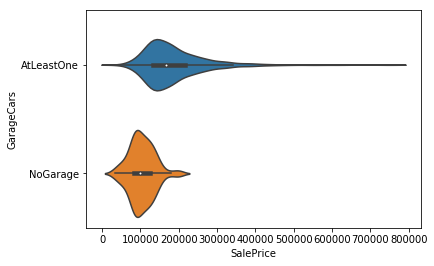

In [58]:
temp = ames.GarageCars.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [59]:
stats.ttest_ind(ames.SalePrice[ames.GarageCars == 'AtLeastOne'], 
                ames.SalePrice[ames.GarageCars == 'NoGarage'], equal_var = False)

Ttest_indResult(statistic=19.461950104195076, pvalue=5.2598260117859324e-42)

### GarageArea

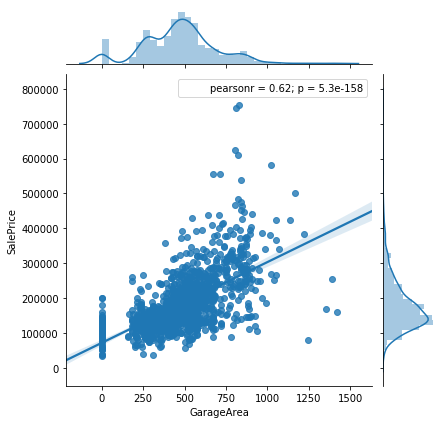

In [60]:
sns.jointplot(x='GarageArea', y='SalePrice', data=ames, kind="reg")

In [61]:
count = ames.GarageArea ==0
count.sum()

81

In [62]:
print(round(100*count.sum()/(len(ames['GarageArea'])),2))

5.55


In [63]:
stats.linregress(ames.GarageArea, ames.SalePrice)

LinregressResult(slope=231.64561450940442, intercept=71357.42140747688, rvalue=0.6234314389183616, pvalue=5.265038167976654e-158, stderr=7.608440114263162)

### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

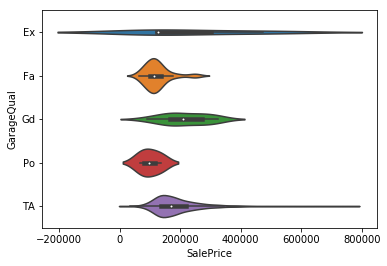

In [5]:
temp = ames.GarageQual.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [6]:
ames.GarageQual.fillna('NG', inplace = True)

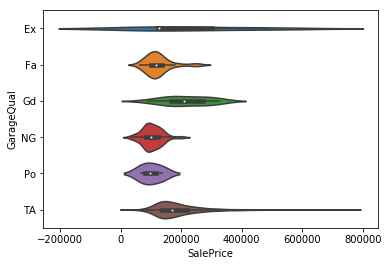

In [7]:
temp = ames.GarageQual.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [8]:
mod = ols('SalePrice ~ GarageQual', data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F        PR(>F)
GarageQual  7.497217e+11     5.0  25.776093  5.388762e-25
Residual    8.458190e+12  1454.0        NaN           NaN


In [9]:
group_garagequal = ames.groupby('GarageQual')

In [10]:
group_garagequal.size()

GarageQual
Ex       3
Fa      48
Gd      14
NG      81
Po       3
TA    1311
dtype: int64

In [11]:
print(round(100*group_garagequal.size()/(len(ames['GarageQual'])),2))

GarageQual
Ex     0.21
Fa     3.29
Gd     0.96
NG     5.55
Po     0.21
TA    89.79
dtype: float64


In [12]:
group_garagequal.size().sum()

1460

In [13]:
ames.GarageQual = ['good' if gqual in ['Ex', 'Gd','TA'] else 'poor/missing' for gqual in ames.GarageQual]

In [14]:
group_garagequal = ames.groupby('GarageQual')

In [15]:
group_garagequal.size()

GarageQual
good            1328
poor/missing     132
dtype: int64

In [16]:
print(round(100*group_garagequal.size()/(len(ames['GarageQual'])),2))

GarageQual
good            90.96
poor/missing     9.04
dtype: float64


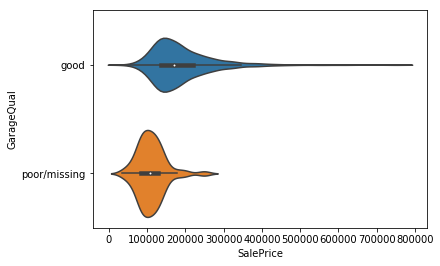

In [110]:
temp = ames.GarageQual.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [111]:
stats.ttest_ind(ames.SalePrice[ames.GarageQual == 'good'], 
                ames.SalePrice[ames.GarageQual == 'poor/missing'], equal_var = False)

Ttest_indResult(statistic=19.57740362452647, pvalue=2.406609960704903e-53)

### GarageCond

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

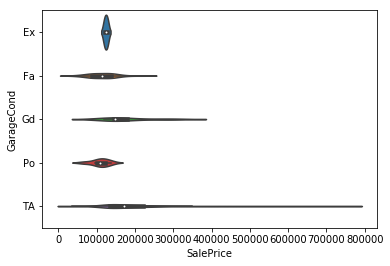

In [185]:
temp = ames.GarageCond.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [186]:
ames.GarageCond.fillna('NG', inplace = True)

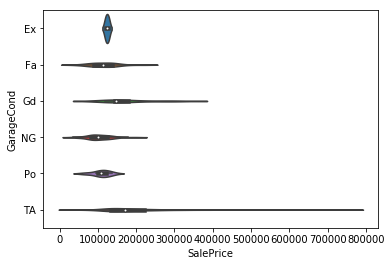

In [187]:
temp = ames.GarageCond.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [188]:
mod = ols('SalePrice ~ GarageCond', data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df          F        PR(>F)
GarageCond  7.490286e+11     5.0  25.750153  5.711746e-25
Residual    8.458883e+12  1454.0        NaN           NaN


In [189]:
group_garagecond = ames.groupby('GarageCond')

In [190]:
group_garagecond.size()

GarageCond
Ex       2
Fa      35
Gd       9
NG      81
Po       7
TA    1326
dtype: int64

In [191]:
group_garagecond.size().sum()

1460

In [192]:
print(round(100*group_garagecond.size()/(len(ames['GarageCond'])),2))

GarageCond
Ex     0.14
Fa     2.40
Gd     0.62
NG     5.55
Po     0.48
TA    90.82
dtype: float64


In [193]:
ames.GarageCond = ['good' if gcond in ['Ex', 'Gd','TA'] else 'poor/missing' for gcond in ames.GarageCond]

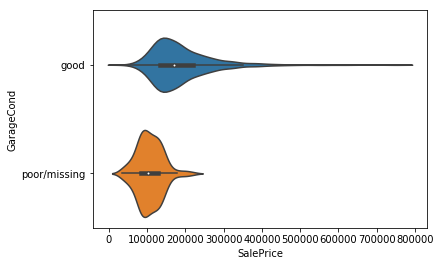

In [194]:
temp = ames.GarageCond.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [195]:
group_garagecond = ames.groupby('GarageCond')

In [196]:
print(round(100*group_garagecond.size()/(len(ames['GarageCond'])),2))

GarageCond
good            91.58
poor/missing     8.42
dtype: float64


In [197]:
stats.ttest_ind(ames.SalePrice[ames.GarageCond == 'good'], 
                ames.SalePrice[ames.GarageCond == 'poor/missing'], equal_var = False)

Ttest_indResult(statistic=21.755415360950337, pvalue=1.957896098927936e-61)

### PavedDrive

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

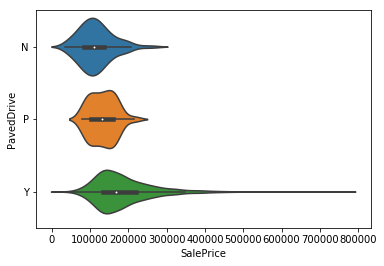

In [127]:
temp = ames.PavedDrive.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [130]:
group_paveddrive = ames.groupby('PavedDrive')

In [131]:
group_paveddrive.size()

PavedDrive
N      90
P      30
Y    1340
dtype: int64

In [132]:
group_paveddrive.size().sum()

1460

In [133]:
print(round(100*group_paveddrive.size()/(len(ames['PavedDrive'])),1))

PavedDrive
N     6.2
P     2.1
Y    91.8
dtype: float64


In [134]:
ames.PavedDrive = ames.PavedDrive.str.replace('P', 'N')

In [135]:
group_paveddrive = ames.groupby('PavedDrive')

In [136]:
group_paveddrive.size()

PavedDrive
N     120
Y    1340
dtype: int64

In [137]:
print(round(100*group_paveddrive.size()/(len(ames['PavedDrive'])),1))

PavedDrive
N     8.2
Y    91.8
dtype: float64


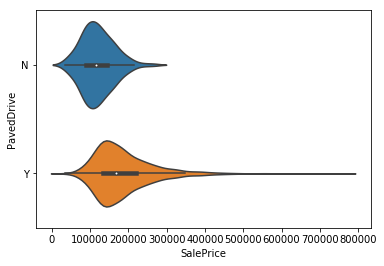

In [138]:
temp = ames.PavedDrive.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [139]:
stats.ttest_ind(ames.SalePrice[ames.PavedDrive == 'Y'], 
                ames.SalePrice[ames.PavedDrive == 'N'], equal_var = False)

Ttest_indResult(statistic=15.09353490587905, pvalue=4.5592368331663083e-35)

### WoodDeckSF

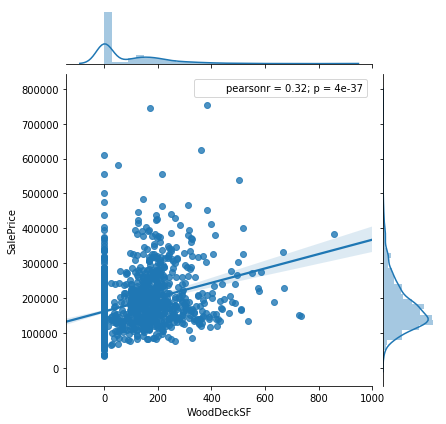

In [140]:
sns.jointplot(x='WoodDeckSF', y='SalePrice', data=ames, kind="reg")

In [141]:
stats.linregress(ames.WoodDeckSF, ames.SalePrice)

LinregressResult(slope=205.62042373751507, intercept=161542.59764040352, rvalue=0.32441344456812954, pvalue=3.972216535628052e-37, stderr=15.701492391416872)

In [142]:
count = ames.WoodDeckSF ==0
count.sum()

761

In [143]:
print(round(100*count.sum()/(len(ames['WoodDeckSF'])),2))

52.12


### OpenPorchSF

OpenPorchSF: Open porch area in square feet



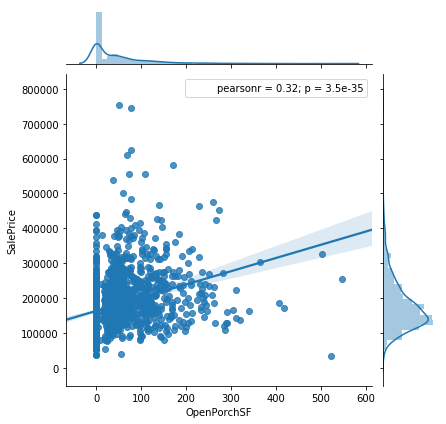

In [144]:
sns.jointplot(x='OpenPorchSF', y='SalePrice', data=ames, kind="reg")

In [145]:
stats.linregress(ames.OpenPorchSF, ames.SalePrice)

LinregressResult(slope=378.71888963376716, intercept=163250.06874149948, rvalue=0.3158562271160554, pvalue=3.493373623094815e-35, stderr=29.793853025441162)

In [146]:
count = ames.OpenPorchSF ==0
count.sum()

656

In [147]:
print(round(100*count.sum()/(len(ames['OpenPorchSF'])),2))

44.93


### EnclosedPorch

EnclosedPorch: Enclosed porch area in square feet


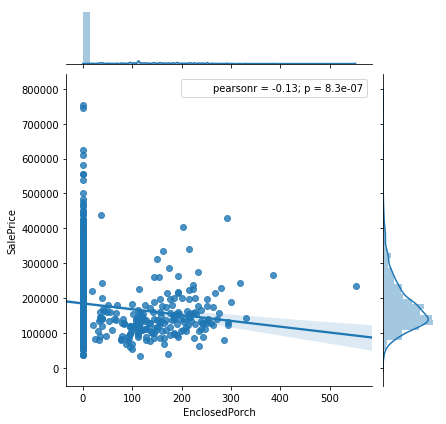

In [148]:
sns.jointplot(x='EnclosedPorch', y='SalePrice', data=ames, kind="reg")

In [149]:
stats.linregress(ames.EnclosedPorch, ames.SalePrice)

LinregressResult(slope=-167.12527950560423, intercept=184590.2825917761, rvalue=-0.1285779579259565, pvalue=8.255770475113626e-07, stderr=33.758015869220905)

In [150]:
count = ames.EnclosedPorch ==0
count.sum()

1252

In [151]:
print(round(100*count.sum()/(len(ames['EnclosedPorch'])),2))

85.75


In [ ]:
# 85% missing, consider dropping
#ames.drop(columns = ['EnclosedPorch'])

## #3SsnPorch

3SsnPorch: Three season porch area in square feet


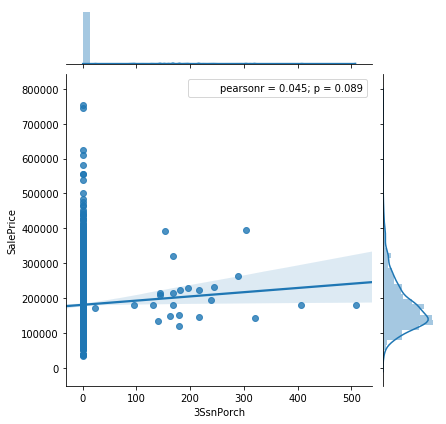

In [152]:
sns.jointplot(x='3SsnPorch', y='SalePrice', data=ames, kind="reg")

In [153]:
stats.linregress(ames['3SsnPorch'], ames.SalePrice)

LinregressResult(slope=120.81038398448354, intercept=180509.28212912686, rvalue=0.044583665335748444, pvalue=0.08858170358056179, stderr=70.89533823577942)

In [154]:
count = ames['3SsnPorch'] ==0
count.sum()

1436

In [155]:
print(round(100*count.sum()/(len(ames['3SsnPorch'])),2))

98.36


In [ ]:
# 98% is zero/missing -- consider dropping
#ames.drop(columns = ['3SsnPorch'])

### ScreenPorch

ScreenPorch: Screen porch area in square feet


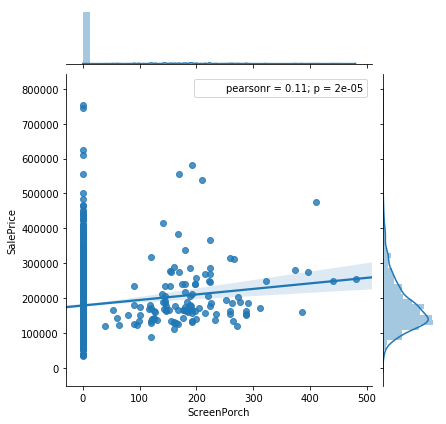

In [156]:
sns.jointplot(x='ScreenPorch', y='SalePrice', data=ames, kind="reg")

In [157]:
stats.linregress(ames.ScreenPorch, ames.SalePrice)

LinregressResult(slope=158.78775055390145, intercept=178529.70010484263, rvalue=0.11144657114291108, pvalue=1.9721400194689517e-05, stderr=37.081525470533954)

In [158]:
count = ames['ScreenPorch'] ==0
count.sum()

1344

In [159]:
print(round(100*count.sum()/(len(ames['ScreenPorch'])),2))

92.05


In [ ]:
# 92% is zero/missing -- consider dropping
#ames.drop(columns = ['ScreenPorch'])

### PoolArea
PoolArea: Pool area in square feet


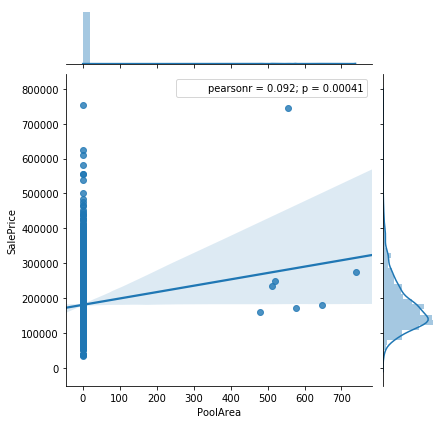

In [160]:
sns.jointplot(x='PoolArea', y='SalePrice', data=ames, kind="reg")

In [161]:
stats.linregress(ames.PoolArea, ames.SalePrice)

LinregressResult(slope=182.70934030078047, intercept=180417.1183405948, rvalue=0.09240354949187315, pvalue=0.0004073489601196203, stderr=51.56218101097866)

In [162]:
count = ames['PoolArea'] ==0
count.sum()

1453

In [163]:
print(round(100*count.sum()/(len(ames['PoolArea'])),2))

99.52


In [ ]:
# 99% is zero/missing -- consider dropping
#ames.drop(columns = ['PoolArea'])

### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

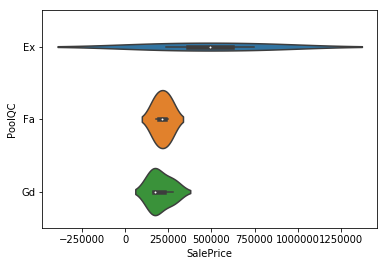

In [164]:
temp = ames.PoolQC.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [165]:
ames.PoolQC.fillna('NPQC', inplace = True)

In [166]:
group_poolqc = ames.groupby('PoolQC')

In [167]:
group_poolqc.size()

PoolQC
Ex         2
Fa         2
Gd         3
NPQC    1453
dtype: int64

In [ ]:
# 99% is zero/missing -- consider dropping
#ames.drop(columns = ['PoolQC'])

### Fence
Fence: Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

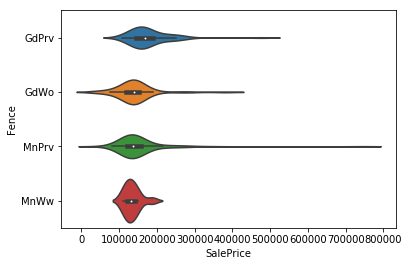

In [198]:
temp = ames.Fence.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [199]:
group_fence = ames.groupby('Fence')

In [200]:
group_fence.size()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
dtype: int64

In [201]:
group_fence.size().sum()

281

In [205]:
ames.Fence.fillna('NF', inplace = True)

In [206]:
group_fence = ames.groupby('Fence')

In [207]:
group_fence.size()

Fence
GdPrv      59
GdWo       54
MnPrv     157
MnWw       11
NF       1179
dtype: int64

In [208]:
print(round(100*group_fence.size()/(len(ames['Fence'])),2))

Fence
GdPrv     4.04
GdWo      3.70
MnPrv    10.75
MnWw      0.75
NF       80.75
dtype: float64


In [209]:
mod = ols('SalePrice ~ Fence', data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
Fence     3.279372e+11     4.0  13.433276  9.379977e-11
Residual  8.879974e+12  1455.0        NaN           NaN


In [213]:
ames.Fence = ['noprivacy' if fen in ['NF'] else 'someprivacy' for fen in ames.Fence]

In [214]:
group_fence = ames.groupby('Fence')

In [215]:
group_fence.size()

Fence
noprivacy      1179
someprivacy     281
dtype: int64

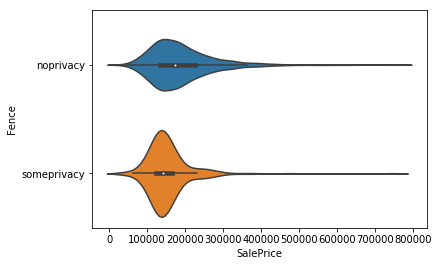

In [217]:
temp = ames.Fence.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [216]:
stats.ttest_ind(ames.SalePrice[ames.Fence == 'someprivacy'], 
                ames.SalePrice[ames.Fence == 'noprivacy'], equal_var = False)

Ttest_indResult(statistic=-7.877748481880988, pvalue=1.8642073683756608e-14)

### #MiscFeature
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

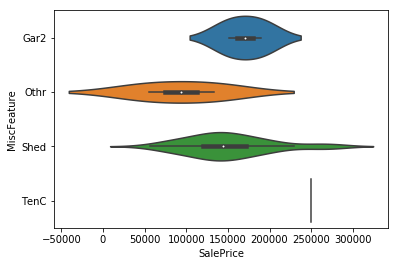

In [218]:
temp = ames.MiscFeature.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [225]:
mod = ols('SalePrice ~ MiscFeature',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df         F    PR(>F)
MiscFeature  6.518974e+10     4.0  2.593622  0.035004
Residual     9.142722e+12  1455.0       NaN       NaN


In [219]:
group_miscfeature = ames.groupby('MiscFeature')

In [220]:
group_miscfeature.size()

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
dtype: int64

In [221]:
group_miscfeature.size().sum()

54

In [222]:
ames.MiscFeature.fillna('No_MiscFeature', inplace = True)

In [223]:
count = ames['MiscFeature'] =='No_MiscFeature'
count.sum()

1406

In [224]:
print(round(100*count.sum()/(len(ames['MiscFeature'])),2))

96.3


In [ ]:
# 96% is zero/missing -- consider dropping
#ames.drop(columns = ['MiscFeature'])

### MiscVal: $Value of miscellaneous feature

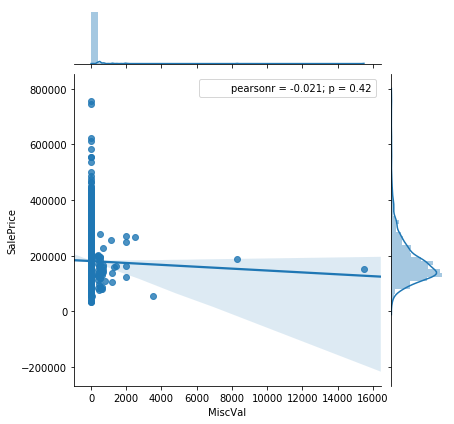

In [226]:
sns.jointplot(x='MiscVal', y='SalePrice', data=ames, kind="reg")

In [227]:
stats.linregress(ames.MiscVal, ames.SalePrice)

LinregressResult(slope=-3.3930157615667, intercept=181068.7548923047, rvalue=-0.021189579640303248, pvalue=0.4184863494080361, stderr=4.192636908727935)

In [228]:
count = ames['MiscVal'] ==0
count.sum()

1408

In [229]:
print(round(100*count.sum()/(len(ames['MiscVal'])),2))

96.44


In [ ]:
# 96% is zero/missing -- consider dropping
#ames.drop(columns = ['MiscVal'])

### 
MoSold: Month Sold (MM)


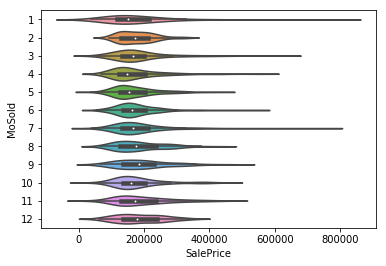

In [245]:
temp = ames.MoSold.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [246]:
group_mosold = ames.groupby('MoSold')

In [247]:
group_mosold.size()

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
dtype: int64

In [248]:
mod = ols('SalePrice ~ MoSold',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)



                sum_sq      df         F    PR(>F)
MoSold    1.985183e+10     1.0  3.150172  0.076128
Residual  9.188060e+12  1458.0       NaN       NaN


### YrSold: 
Year Sold (YYYY)


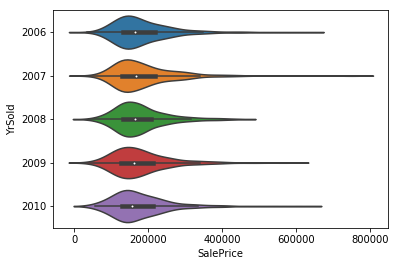

In [249]:
temp = ames.YrSold.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [250]:
group_yrsold = ames.groupby('YrSold')

In [251]:
group_yrsold.size()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
dtype: int64

In [252]:
mod = ols('SalePrice ~ YrSold',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
YrSold    7.702565e+09     1.0  1.220661  0.269413
Residual  9.200209e+12  1458.0       NaN       NaN


### #SaleType
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		


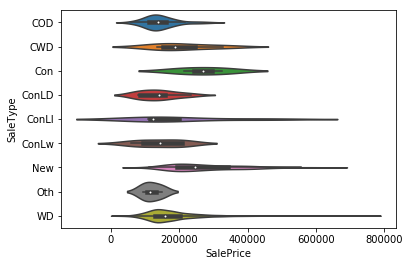

In [253]:
temp = ames.SaleType.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [254]:
group_SaleType = ames.groupby('SaleType')

In [255]:
group_SaleType.size()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
dtype: int64

In [258]:
group_SaleType.size().sum()

1460

In [256]:
print(round(100*group_SaleType.size()/(len(ames['SaleType'])),2))

SaleType
COD       2.95
CWD       0.27
Con       0.14
ConLD     0.62
ConLI     0.34
ConLw     0.34
New       8.36
Oth       0.21
WD       86.78
dtype: float64


In [257]:
mod = ols('SalePrice ~ SaleType',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
SaleType  1.264131e+12     8.0  28.863054  5.039767e-42
Residual  7.943780e+12  1451.0        NaN           NaN


In [259]:
ames.SaleType = ['deed' if stype in ['WD', 'CWD'] else 'other' for stype in ames.SaleType]

In [260]:
group_SaleType = ames.groupby('SaleType')

In [261]:
group_SaleType.size()

SaleType
deed     1271
other     189
dtype: int64

In [262]:
print(round(100*group_SaleType.size()/(len(ames['SaleType'])),2))

SaleType
deed     87.05
other    12.95
dtype: float64


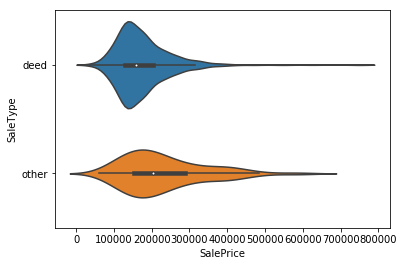

In [263]:
temp = ames.SaleType.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [264]:
stats.ttest_ind(ames.SalePrice[ames.SaleType == 'deed'], 
                ames.SalePrice[ames.SaleType == 'other'], equal_var = False)

Ttest_indResult(statistic=-6.989193401577007, pvalue=3.515922621839161e-11)

### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

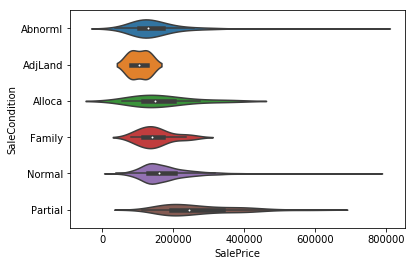

In [265]:
temp = ames.SaleCondition.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [266]:
group_SaleCond = ames.groupby('SaleCondition')

In [267]:
group_SaleCond.size()

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64

In [270]:
group_SaleCond.size().sum()

1460

In [269]:
print(round(100*group_SaleCond.size()/(len(ames['SaleCondition'])),2))

SaleCondition
Abnorml     6.92
AdjLand     0.27
Alloca      0.82
Family      1.37
Normal     82.05
Partial     8.56
dtype: float64


In [271]:
mod = ols('SalePrice ~ SaleCondition',
               data=ames).fit()
               
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df          F        PR(>F)
SaleCondition  1.247649e+12     5.0  45.578428  7.988268e-44
Residual       7.960263e+12  1454.0        NaN           NaN


In [272]:
ames.SaleCondition = ['normal' if scond in ['Normal'] else 'other' for scond in ames.SaleCondition]

In [273]:
group_SaleCond = ames.groupby('SaleCondition')

In [274]:
group_SaleCond.size()

SaleCondition
normal    1198
other      262
dtype: int64

In [275]:
group_SaleCond.size().sum()

1460

In [276]:
print(round(100*group_SaleCond.size()/(len(ames['SaleCondition'])),2))

SaleCondition
normal    82.05
other     17.95
dtype: float64


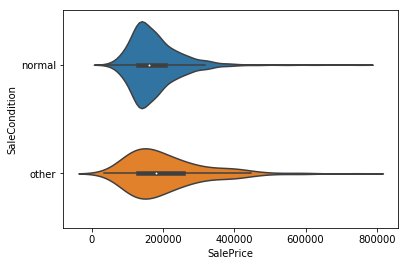

In [278]:
temp = ames.SaleCondition.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames)

In [277]:
stats.ttest_ind(ames.SalePrice[ames.SaleCondition == 'normal'], 
                ames.SalePrice[ames.SaleCondition == 'other'], equal_var = False)

Ttest_indResult(statistic=-4.487026080044994, pvalue=1.0211163521984762e-05)